# Week 02 Assignment glucose level data


Missing data occurs commonly in many data applications. Especially wearable sensor devices encounter measurement errors resulting in missing data. Although pandas can handle missing data, for instance, to exclude missing data in the descriptive analysis, we might decide to reshape our data to improve quality. We might consider excluding certain rows, columns, or decide to impute our data if we take an argumentative approach. This week we will work with sensor data of a semester 01 project. The data is timeseries related but a lot of sensor errors occurred. First, we inspect the quality data. Then we will work with imputation, interpolation, and smoothing techniques to overcome this issue of the error readings. Finaly we plot the data. Visualization is a method to translate data into information. As a data scientist you should be able to choose an appropiate visualizations. 


Keywords: data loading, data inspection, data exploration, data cleaning, impute data, missing data, timeseries, pandas, visualization, interactive plots, overflow/underflow error

More to read
- https://fennaf.gitbook.io/bfvm22prog1/
- https://towardsdatascience.com/how-to-analyze-blood-glucose-data-with-python-data-science-packages-4f160f9564be


More about pandas and bokeh programming
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
- https://rubberduckdebugging.com/
- https://docs.bokeh.org/en/latest/docs/gallery.html


Learning objectives

- Further practice numpy / pandas
- Read, inspect, clean, and impute JSON data. Handle missing data
- Apply different interpolation/smoothing techniques
- Recognize overflow/underflow error
- Perform visual and statistical analysis for time series data
- Maintain development environment 
- Apply coding standards and FAIR principles


Note: you can bring your own sensor data, but for the practical you need some missing data points. 

By the end of this week the student can:

- load a json dataset 
- typecast the Pandas DataFrame to appropiate data types
- inspect the dataset for quality and metadata information
- add a column with interpolated data in Pandas DataFrame
- perform visual analysis

please add your own topics you want to learn here: https://padlet.com/ffeenstra1/69vbvy0l8t32rq55


The assignment consists of 6 parts:

- [part 1: load the data](#0)
     - [Exercise 1.1](#ex-11)
- [part 2: prepare for inspection](#1)
     - [Exercise 2.1](#ex-21)
- [part 3: inspect the data](#2)
     - [Exercise 3.1](#ex-31)
- [part 4: interpolate the data](#3)
     - [Exercise 4.1](#ex-41)
- [part 5: visualize the data](#4)
     - [Exercise 5.1](#ex-51)
- [part 6: Challenge](#5)
     - [Exercise 6.1](#ex-61)

Part 1 and 5 are mandatory, part 6 is optional (bonus)
Mind you that you cannot copy code without referencing the code. If you copy code you need to be able to explain your code verbally and you will not get the full score. 


<a name='0'></a>
## Part 1: Load the data

Instructions: Load the json datafile `glucose.json` into a pandas dataframe. Check your dataframe with a `.head()` to compare with the expected outcome. 

Preferably we read the data not with a hard coded data path but using a config file. See https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>json.load() method reads a file, pd.read_json converts it to a Pandas DataFrame</li>
    <li>when loading into a Pandas DataFrame use records orientation </li>
</ul>
</details>

<a name='ex-11'></a>
### Code your solution

In [1]:
import pandas as pd
print(pd.__version__)
import numpy as np
print(np.__version__)
import json as jsn
# import panel as pn
import yaml
from io import StringIO

2.2.3
2.2.3


In [2]:
def configReader(config_path):
    """
    This function opens config.yaml file 
    and fetches the file's data.
    input: configue file path
    output: configue file
    """
    with open(config_path, "r") as file:
        config = yaml.safe_load(file)
    return config

In [3]:
# Parsing the config file.
config = configReader("../config/config.yaml")
print(config.keys())
# config.values()

dict_keys(['dir_path', 'eeg', 'glucose'])


In [4]:
# opening and reading the json file from config. 
glucose_json = open(f"{config['dir_path']}/{config['glucose']}")
# glucose_json.read()

# Deserializing json file to make it ready for tabular format. (parsing)
glucose_data = jsn.load(glucose_json)

# to avoide the following
"""
Pandas Warning: 
FutureWarning: Passing literal json to 'read_json' is deprecated\
and will be removed in a future version.
To read from a literal string, wrap it in a 'StringIO' object.
"""
# wrap the json in stringio object
json_buffer = StringIO(glucose_data)

# Creating a DataFrame from the json file.
glucose_df = pd.read_json(json_buffer)
print(glucose_df.head())

       ID              time  recordtype glucose
0  2845.0  2019-04-25 00:08           1     109
1  2850.0  2019-04-25 00:50           1        
2  2877.0  2019-04-25 07:02           1     123
3  2881.0  2019-04-25 07:34           1     158
4  2886.0  2019-04-25 08:19           1        


In [5]:
# Inspecting the DataFrame.
print(f"Shape:\n{glucose_df.shape}")
print(f"\nColumns:\n{glucose_df.columns}")
print(f"\nData Types:\n{glucose_df.dtypes}")

Shape:
(136, 4)

Columns:
Index(['ID', 'time', 'recordtype', 'glucose'], dtype='object')

Data Types:
ID            float64
time           object
recordtype      int64
glucose        object
dtype: object


#### Expected outcome: 

<a name='1'></a>
## Part 2: Prepare the data

Check the datatypes of your dataframe.
- The `glucose` field should be an integer.
- the `time` field should have a datetime format.
- If the datatypes are different you should typecast them to the right format.
- Make sure that your dataset is sorted by the time column.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use astype() method or pandas.DataFrame.to_datetime() for instance</li>
    <li>make sure that the empty spaces are filled with NaN. Use errors='coerce'</li>
    <li>set_index(), sort_index() and reset_index() are helpful to sort on index</li>
</ul>
</details>

<a name='ex-21'></a>
### Code your solution

In [6]:
# Typecasting the 'time' column to datetime.
glucose_df['time'] = pd.to_datetime(glucose_df['time'])

# Typecasting the 'glucose' column to integer.
# glucose_df['glucose'] = glucose_df['glucose'].astype(int, errors='ignore')
glucose_df['glucose'] = pd.to_numeric(glucose_df['glucose'], errors='coerce').astype('float')

# Typecasting the 'ID' column to integer.
# glucose_df['ID'] = pd.to_numeric(glucose_df['ID'], errors='coerce').astype('Int64')
print(f"\nData Types:\n{glucose_df.dtypes}")


Data Types:
ID                   float64
time          datetime64[ns]
recordtype             int64
glucose              float64
dtype: object


In [7]:
# Creating a copy of the DataFrame.
ndf_glucose = glucose_df.copy()
# re-aranging the columns. Sorting the DataFrame by 'time'.
ndf_glucose = ndf_glucose[['time'] + [col for col in ndf_glucose.columns if col != 'time']]
ndf_glucose = ndf_glucose.sort_values(by='time').reset_index(drop=True)
ndf_glucose

,time,ID,recordtype,glucose
0,2019-04-25 00:08:00,2.845000e+03,1,109.0
1,2019-04-25 00:14:00,1.614305e+19,0,NaN
2,2019-04-25 00:29:00,1.614305e+19,0,NaN
3,2019-04-25 00:44:00,1.614305e+19,0,NaN
4,2019-04-25 00:50:00,2.850000e+03,1,NaN
...,...,...,...,...
131,2019-04-25 23:02:00,1.614305e+19,0,NaN
132,2019-04-25 23:18:00,1.614305e+19,0,NaN
133,2019-04-25 23:31:00,3.062000e+03,1,111.0
134,2019-04-25 23:33:00,1.614305e+19,0,NaN


#### Expected outcome: 

<a name='2'></a>
## Part 3: Inspect the data

Now that we prepared the data we are going to inspect the data to get more familiar with the data. You can answer the questions below but feel free to explore the data further by plotting and or statistics, group by overviews and so on. 

To be answered at least:
- what is the quantity of the data (observations and features)
- what is the percentage missing data for glucose?
- is there a specific pattern for glucose value and recordtype?
- what is the time range?

Code the solutions to your answers. Create meaningful overviews or statistics

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>In the week 01 assignment some functions were explained to inspect missing values</li>
    <li>In the week 01 assignment some functions were explained to groupby value</li>
</ul>
</details>

<a name='ex-31'></a>
### Code your solution

In [8]:
# Inspecting the DataFrame by isolating numerical columns.
num_cols = ndf_glucose.select_dtypes(include=['number'])


# number of decimals set to 1 to prevent the dataset getting crowded with decimals.
pd.set_option('display.float_format', '{:.1f}'.format)
# Basic statistical summaries of numerical columns.
print(f"Basic statistical summaries of numerical columns:\n{num_cols.describe()}")

Basic statistical summaries of numerical columns:
                          ID  recordtype  glucose
count                  136.0       136.0     52.0
mean   9733307937665581056.0         0.4    123.4
std    7927805510548373504.0         0.5     20.7
min                   2845.0         0.0     86.0
25%                   2991.5         0.0    109.8
50%   16143047311250231296.0         0.0    121.5
75%   16143047311250231296.0         1.0    129.0
max   16143047311250233344.0         1.0    184.0


In [9]:
# Checking for missing values.
print(f"Missing values:\n{ndf_glucose.isnull().sum()}")

# Percentage of missing values.
print(f"\nPercentage of missing values:\n{ndf_glucose.isnull().mean() * 100}")

# Checking for duplicates.
print(f"\nNumber of duplicates: ({ndf_glucose.duplicated().sum()})")

Missing values:
time           0
ID             0
recordtype     0
glucose       84
dtype: int64

Percentage of missing values:
time          0.0
ID            0.0
recordtype    0.0
glucose      61.8
dtype: float64

Number of duplicates: (0)


In [10]:
# Checking the time range of the data.
time_range = ndf_glucose['time'].min(), ndf_glucose['time'].max()
time_diff = time_range[1] - time_range[0]
print(f"time range for this experiment is:\n{time_range}\n{time_diff}")

time range for this experiment is:
(Timestamp('2019-04-25 00:08:00'), Timestamp('2019-04-25 23:48:00'))
0 days 23:40:00


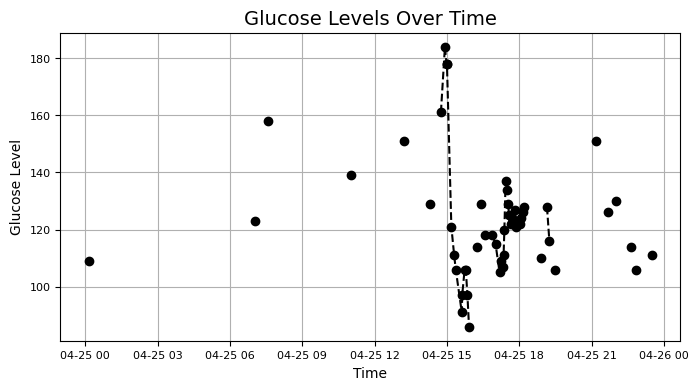

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the matplotlib global configurations.
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

# Line Plot for glucose over time (visualizing time range for each registered glucose value)
plt.figure(figsize=(8,4))
plt.plot(ndf_glucose['time'], ndf_glucose['glucose'],
         marker='o', linestyle='--', color='black')
plt.title('Glucose Levels Over Time', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Glucose Level')
plt.grid()
plt.show()

In [13]:
# number of decimals set to 1.
# column ID likely contains very large values, which Pandas automatically formats using scientific notation/
# for brevity when the numbers exceed a certain size.
# Despite setting pd.set_option('display.float_format', '{:.1f}'.format),/
# this option does not affect the formatting of arrays or lists (e.g., the output of .unique())./
# Instead, scientific notation persists due to the NumPy array returned by .unique().
pd.set_option('display.float_format', '{:.1f}'.format)

# checking for unique values in the 'ID' column, and/
# Inspecting how many values are associated with each ID.
grouped_id = ndf_glucose.groupby(['ID']).size()
print(f"\nlenght of unique values:\n{len(grouped_id)}")


lenght of unique values:
56


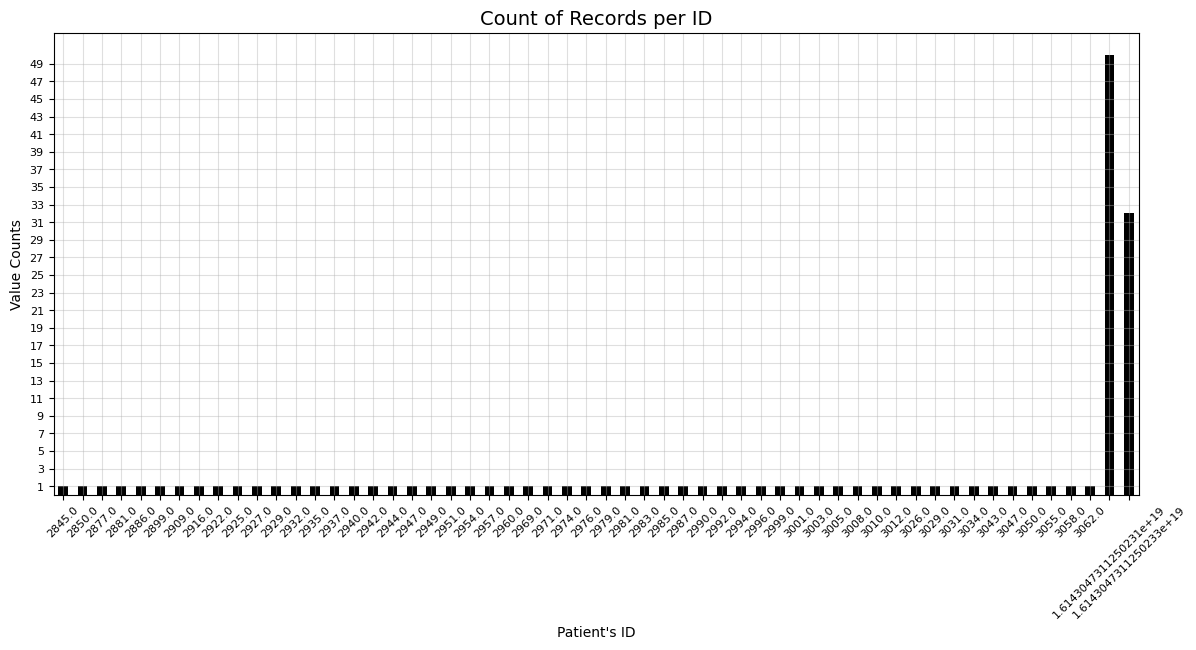

In [14]:
# Visualizing the grouped by ID columns results.(number of values associated with each ID)
grouped_id.plot(kind="bar", figsize=(14, 6), color="black")
plt.title("Count of Records per ID", fontsize=14)
plt.xlabel("Patient's ID")
plt.ylabel("Value Counts")
plt.yticks(range(1,50,2))
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.show()


In [15]:
print(f"{ndf_glucose.groupby(['recordtype', 'ID']).count().head()}")
# The ID column in dataset contains extremely large numbers (e.g., 16143047311250231296.0)/
# alongside smaller ones (e.g., 2845.0 and 2850.0).
# These values may have been introduced due to data corruption or placeholders for missing IDs.

                                   time  glucose
recordtype ID                                   
0          16143047311250231296.0    50        0
           16143047311250233344.0    32        0
1          2845.0                     1        1
           2850.0                     1        0
           2877.0                     1        1


In [16]:
# Unique vqlues in the 'recordType' column.
print(f"Unique values in the 'recordType' column:\n{ndf_glucose['recordtype'].unique()}")

# corresponding counts of the unique values in the 'recordType' column.
grouped_recordtype = ndf_glucose.groupby(['recordtype']).count()
print(grouped_recordtype)

print(f"\nit seems that there is ({grouped_recordtype.glucose[0]}) glucose registers for recordtype ({grouped_recordtype.index[0]})")
print(f"it seems that there is ({grouped_recordtype.glucose[1]}) glucose registers for recordtype ({grouped_recordtype.index[1]})")

Unique values in the 'recordType' column:
[1 0]
            time  ID  glucose
recordtype                   
0             82  82        0
1             54  54       52

it seems that there is (0) glucose registers for recordtype (0)
it seems that there is (52) glucose registers for recordtype (1)


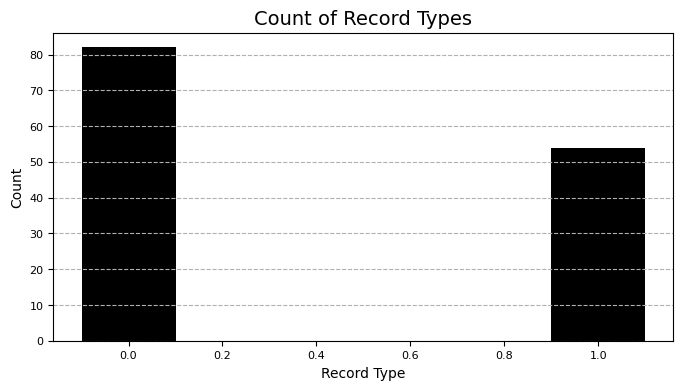

In [17]:
# Frequency of each unique record type in dataset.
plt.figure(figsize=(8,4))
plt.bar(ndf_glucose['recordtype'].value_counts().index,
        ndf_glucose['recordtype'].value_counts().values,
        color='black',
        width=0.2)
plt.title('Count of Record Types', fontsize=14)
plt.xlabel('Record Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')
plt.show()

- so we can coclude that the record type `(0)` as well as those long `(ambiguous IDs)` are registered in dataset in response to miising values or data corruption or when the glucose value was unknown

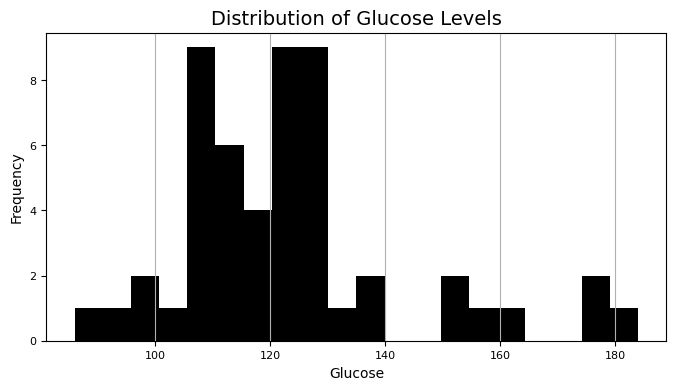

In [18]:
# Histogram for Distribution of glucose
plt.figure(figsize=(8,4))
plt.hist(ndf_glucose['glucose'], bins=20, color='black')
plt.title('Distribution of Glucose Levels', fontsize=14)
plt.xlabel('Glucose')
plt.ylabel('Frequency')

plt.grid(axis='x')
plt.show()

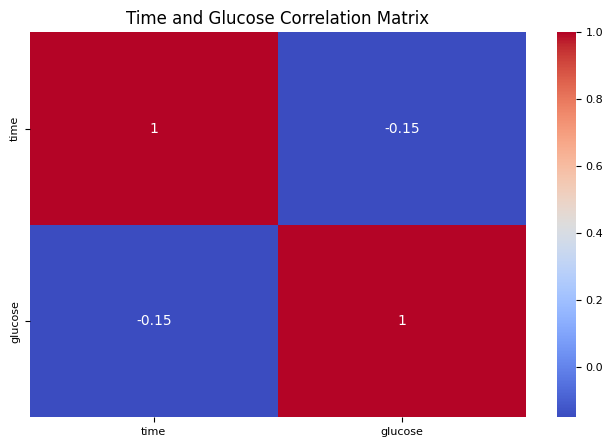

In [19]:
# To investigate correlations between time and glucose columns
plt.figure(figsize=(8, 5))
sns.heatmap(ndf_glucose[['time', 'glucose']].corr(), annot=True, cmap='coolwarm')
plt.title('Time and Glucose Correlation Matrix')
plt.show()


#### Expected outcome percentage missing data
0.6176470588235294

<a name='3'></a>
## Part 4: Interpolate the data

A lot of data is missing. Use interpolation to fill the missing values. Create a new column with the interpolated data. Take an argumentative approach. Select an interpolation method that suits the nature of the data and explain your choice. Mind you that the expected outcome of the interpolation values can differ from the example below

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use Pandas.DataFrame.interpolate() method</li>
</ul>
</details>

<a name='ex-41'></a>
### Code your solution

* when almost more than 60% of Continuous Glucose Monitor (CGM) data is missing, interpolation can be tricky but still possible. The best method depends on the distribution of missing data, and the size of missing data gaps.

In [20]:
# Linear Interpolation from pandas.

interpolated_df = ndf_glucose.copy()

interpolated_df['interpolated_glucose'] = interpolated_df['glucose'].interpolate(method='linear').astype('float')
interpolated_df.head()

,time,ID,recordtype,glucose,interpolated_glucose
0,2019-04-25 00:08:00,2845.0,1,109.0,109.0
1,2019-04-25 00:14:00,16143047311250231296.0,0,NaN,109.5
2,2019-04-25 00:29:00,16143047311250231296.0,0,NaN,109.9
3,2019-04-25 00:44:00,16143047311250231296.0,0,NaN,110.4
4,2019-04-25 00:50:00,2850.0,1,NaN,110.9


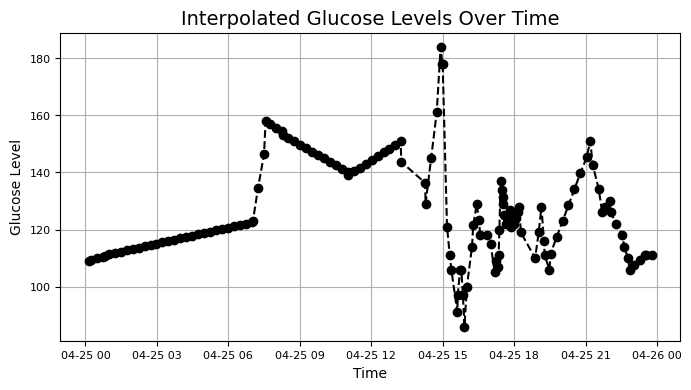

In [21]:
# Line Plot for interpolated glucose over time.
plt.figure(figsize=(8,4))
plt.plot(interpolated_df['time'], interpolated_df['interpolated_glucose'],
         marker='o', linestyle='--', color='black')
plt.title('Interpolated Glucose Levels Over Time', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Glucose Level')
plt.grid()
plt.show()

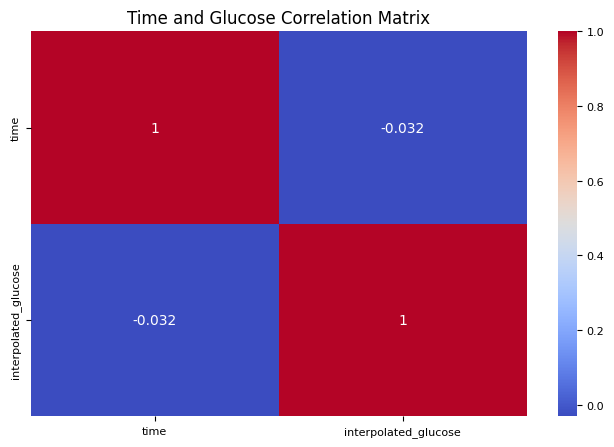

In [22]:
# To investigate correlations between time and glucose columns.
plt.figure(figsize=(8, 5))
sns.heatmap(interpolated_df[['time', 'interpolated_glucose']].corr(), annot=True, cmap='coolwarm')
plt.title('Time and Glucose Correlation Matrix')
plt.show()


In [24]:
# Using interpolation methods from scipy library.
from scipy.interpolate import interp1d

# Convert time to numeric values (e.g., seconds from the first timestamp)/
# its necessary when working with scipy interpolation method.
# time delta calculate the distance of each time point from the starting point.
time_delta = interpolated_df['time'] - interpolated_df['time'].min()

# converting datetime to seconds, and adding them to a new 'time_numeric' column.
interpolated_df.loc[:, 'time_numeric'] = time_delta.dt.total_seconds()

# Re-arranging columns
interpolated_df = interpolated_df[['time', 'time_numeric'] + [col for col in interpolated_df.columns if col not in ['time', 'time_numeric']]]
print(interpolated_df.shape)
interpolated_df.head()

(136, 6)


,time,time_numeric,ID,recordtype,glucose,interpolated_glucose
0,2019-04-25 00:08:00,0.0,2845.0,1,109.0,109.0
1,2019-04-25 00:14:00,360.0,16143047311250231296.0,0,NaN,109.5
2,2019-04-25 00:29:00,1260.0,16143047311250231296.0,0,NaN,109.9
3,2019-04-25 00:44:00,2160.0,16143047311250231296.0,0,NaN,110.4
4,2019-04-25 00:50:00,2520.0,2850.0,1,NaN,110.9


In [25]:
# Checking for nan values.
print(interpolated_df['glucose'].isna().sum())

# Removing nan values.We need a clean dataset (without NaNs) to build an interpolation function/
# that maps known time values to known glucose values./
# This function will later be used to fill in the missing values.
no_nan_interpolated_df = interpolated_df.dropna(subset=['glucose'])

# Double checking to see if nans are droped.
print(no_nan_interpolated_df['glucose'].isna().sum())

84
0


In [26]:
# Create interpolation function.
time_numeric = no_nan_interpolated_df['time_numeric']
no_nan_glucose = no_nan_interpolated_df['glucose']

# this function outputs estimated glucose values based on known data.
# Linear
l_interpolation_f = interp1d(time_numeric,no_nan_glucose, kind='linear', fill_value='extrapolate')
# Nearest
n_interpolation_f = interp1d(time_numeric,no_nan_glucose, kind='nearest', fill_value='extrapolate')
# Cubic
c_interpolation_f = interp1d(time_numeric,no_nan_glucose, kind='cubic', fill_value='extrapolate')

In [27]:
# calling the interpolation function on the numeric time column to fill the missing values/
# (actually it affects all the values not especifically nans).

# interpolated_df['interpolated_glucose_l'] = l_interpolation_f(interpolated_df['time_numeric'])
# interpolated_df['interpolated_glucose_n'] = n_interpolation_f(interpolated_df['time_numeric'])
# interpolated_df['interpolated_glucose_c'] = c_interpolation_f(interpolated_df['time_numeric'])

# when we want to especifically interpolate just the missing or nans.
nan_vals = interpolated_df['glucose'].isna()
# Linear
interpolated_df.loc[nan_vals,'interpolated_glucose_l'] = l_interpolation_f(interpolated_df.loc[nan_vals,'time_numeric'])
# Nearest
interpolated_df.loc[nan_vals,'interpolated_glucose_n'] = n_interpolation_f(interpolated_df.loc[nan_vals,'time_numeric'])
# Cubic
interpolated_df.loc[nan_vals,'interpolated_glucose_c'] = c_interpolation_f(interpolated_df.loc[nan_vals,'time_numeric'])
print(interpolated_df.shape)
interpolated_df.head()

(136, 9)


,time,time_numeric,ID,recordtype,glucose,interpolated_glucose,interpolated_glucose_l,interpolated_glucose_n,interpolated_glucose_c
0,2019-04-25 00:08:00,0.0,2845.0,1,109.0,109.0,NaN,NaN,NaN
1,2019-04-25 00:14:00,360.0,16143047311250231296.0,0,NaN,109.5,109.2,109.0,77.6
2,2019-04-25 00:29:00,1260.0,16143047311250231296.0,0,NaN,109.9,109.7,109.0,6.0
3,2019-04-25 00:44:00,2160.0,16143047311250231296.0,0,NaN,110.4,110.2,109.0,-55.8
4,2019-04-25 00:50:00,2520.0,2850.0,1,NaN,110.9,110.4,109.0,-78.0


#### Example outcome

<a name='4'></a>
## Part 5: Plot the data

Create a plot with the original data and the interpolated data. Consider what the best representation is for visualisation of actual values and modelled/imputed values. Provide argumentation for the plot of choice. 

Mind you, there are several types of plots. The most used are: 
- Compare values->	Bar, boxplot, violin plot, scatter, line. 
- Show composition-> Stacked bar, pie, mosaic, area, burtin.
- Show distribution-> 	Histogram, density, qqplot, bubble. 
- Analyzing trend-> Line, bar, dual axis 
- Relations-> Scatter, heatmap


### Code your solution

In [28]:
from bokeh.plotting import figure, show, ColumnDataSource, output_file
from bokeh.models import Legend, Select, CustomJS
from bokeh.layouts import gridplot, column
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [29]:
# Creating a ColumnDataSource object.
# Create a ColumnDataSource object to store data dynamically.
source = ColumnDataSource(data={
    'x': interpolated_df['time_numeric'],
    'y': interpolated_df['glucose'],
    'y_linear': interpolated_df['interpolated_glucose_l'],
    'y_nearest': interpolated_df['interpolated_glucose_n'],
    'y_cubic': interpolated_df['interpolated_glucose_c'],
})

# ColumnDataSource requires all arrays to be of the same length./
# thats why a separate source for missing values.
missing_source =ColumnDataSource(data={
    # Isolating the missing Data Points.
    'missing_data': interpolated_df['time_numeric'][interpolated_df['glucose'].isna()],
    # setting the missing data points on x axis.
    'missing_data_y': np.zeros_like(interpolated_df['time_numeric'][interpolated_df['glucose'].isna()])
})


In [30]:
# Plotting the original and interpolated data for comparison.

# Create the bokeh figure
p = figure(
    width=1000, height=500,
    title='Comparing different interpolation methods',
    tools='pan, wheel_zoom, reset, save'
)

# Setting axises labels
p.xaxis.axis_label = 'Time (s)'
p.yaxis.axis_label = 'Glucose level'
p.title.align = 'center'
p.title.text_font_size = '16pt'


# Function for creating scatter plot.
def scatter_plot(plot, source, x_col, y_col, color, marker):
    """
    Creates a scatter plot for a given x and y.
    """
    return plot.scatter(
        x_col, y_col, source=source,
        color=color, marker=marker,
        size=6, alpha=0.8)


# function for creating a line plot.
def line_plot(plot, source, x_col, y_col, color):
    """
    Creates a line plot for a given interpolation method.
    """
    return plot.line(
        x_col, y_col, source=source,
        color=color, line_width=2)


# Create interpolation line plots.
original_data = line_plot(p, source, 'x', 'y', 'black')
linear_interpol = line_plot(p, source, 'x', 'y_linear', 'blue')
nearest_interpol = line_plot(p, source, 'x', 'y_nearest', 'red')
cubic_interpol = line_plot(p, source, 'x', 'y_cubic', 'green')

# Scatter plot of the original glucose registers (prior to interpolation)
original_data_points = scatter_plot(p, source, 'x', 'y', color='black', marker='o')

# Plotting original missing data points.
original_missing_data = scatter_plot(p, missing_source, 'missing_data', 'missing_data_y',
    color='green', marker='x')


# Defining a legend object. (mainly to set the legend outside of the plot)
legend = Legend(items=[
    ('Original Data', [original_data_points]),
    ('Linear Interpolation', [linear_interpol]),
    ('Nearest Interpolation', [nearest_interpol]),
    ('Cubic Interpolation', [cubic_interpol]),
    ('Original Missing Data', [original_missing_data])
])
p.add_layout(legend,'left')

# show(p)

**The primary glucose dataset is fragmented due to missing data; however, the interpolated datasets became continuous.**

<a name='6'></a>
## Part 6: Challenge

It might even be interesting to introduce a widget in which you can select different methods to interpolate.
1. Can you improve the interpolation by choosing an other method?
2. Can you add an rolling mean line? 
2. Can you improve the plot by making it interactive?

<a name='ex-61'></a>
### Code your solution

In [31]:
# this will generate a standalone HTML file.
# output_file("interactive_interpolation.html")

# Creating a dropdown widget
interpolation_method = Select(
    title='Interpolation Method', value='None',
    options=['None','Original', 'Linear', 'Nearest', 'Cubic'])

# JavaScript callback to update the plot
callback = CustomJS(
    args=dict(linear=linear_interpol, nearest=nearest_interpol,
              cubic=cubic_interpol, original= original_data_points, line= original_data),
    code="""
    // Hide all plots
    line.visible = false;
    original.visible = false;
    linear.visible = false;
    nearest.visible = false;
    cubic.visible = false;
    
    // Show the selected interpolation method
    if (cb_obj.value == 'Linear') {
        linear.visible = true;
        original.visible = true;
        line.visible = true;
    } else if (cb_obj.value == 'Nearest') {
        nearest.visible = true;
        original.visible = true;
        line.visible = true;
    } else if (cb_obj.value == 'Cubic') {
        cubic.visible = true;
        original.visible = true;
        line.visible = true;
    } else if (cb_obj.value == 'Original') {
        original.visible = true;
        line.visible = true;
    }
"""
)


# Attach the JavaScript callback to the select widget
interpolation_method.js_on_change("value", callback)

# Layout the select widget with the plot
layout = column(interpolation_method, p)

# Save the output to a file
show(layout)

In [32]:
# rollingMean = pd.Series(df['glucose'], index=df['time'])
# rollingMean = rollingMean.rolling(window='1H').mean()
# rollingMean

# # Calculate rolling mean (with a window size of 3)
# window_size = 3
# rolling_mean = pd.Series(interpolated_df['glucose']).rolling(window=window_size, min_periods=1).mean().to_numpy()

# len(rolling_mean)

def rolling_mean(y):
    return pd.Series(y).rolling(
        window=3, min_periods=1).mean().to_numpy()


# original_data = line_plot(p, source, 'x', rolling_mean(source.data['y_nearest']), 'black')

